In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings

warnings.filterwarnings('ignore')

import pickle

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.stattools import grangercausalitytests

# 전처리

In [3]:
with open('../preprocess_data/pickle_final.pkl', 'rb') as file:
    df = pickle.load(file)

In [4]:
df.columns

Index(['GNI', 'GNI 증감률', '전체_사교육비', '초등학교_사교육비', '중학교_사교육비', '고등학교_사교육비',
       'GDP디플레이터_증감률', '총지수_증감률', '생활물가지수_증감률', '신선식품지수_증감률', '조혼인율', '조이혼율',
       '여성초혼 연령', '국공립 어린이집 비율', '여성경제 활동참가율', '수도권_인구밀도', '부산_인구밀도', '출생아수',
       '초등학교', '중학교', '고등학교', '대학교', '알코올 질환 인구 10만 명당 여성 사망률', '물가수준전망CSI_부산',
       '물가수준전망CSI_경기', '물가수준전망CSI_강원', '물가수준전망CSI_전북', '소비지출전망CSI_부산',
       '소비지출전망CSI_경기', '소비지출전망CSI_강원', '소비지출전망CSI_전북', '교육비 지출전망CSI_부산',
       '교육비 지출전망CSI_경기', '교육비 지출전망CSI_강원', '교육비 지출전망CSI_전북', '취업기회전망CSI_부산',
       '취업기회전망CSI_경기', '취업기회전망CSI_강원', '취업기회전망CSI_전북', '현재경기판단CSI_부산',
       '현재경기판단CSI_경기', '현재경기판단CSI_강원', '현재경기판단CSI_전북', '향후경기전망CSI_부산',
       '향후경기전망CSI_경기', '향후경기전망CSI_강원', '향후경기전망CSI_전북', '주택가격지수_전국',
       '주택가격지수_수도권', '주택가격지수_지방', '가구소득평균', '가임기(15~45세) 여성수', '알코올의존',
       '알코올남용', '니코틴의존', '니코틴금단', '주요우울장애', '기분부전장애', '강박장애', '공황장애', '광장공포증',
       '사회공포증', '범불안장애', '특정공포증'],
      dtype='object')

In [5]:
gni_real = df[['GNI']]
gni_rate = df[['GNI 증감률']]
tutor_tot = df[['전체_사교육비']]
tutor_elem = df[['초등학교_사교육비']]
tutor_mid = df[['중학교_사교육비']]
tutor_high = df[['고등학교_사교육비']]
gdp_rate = df[['GDP디플레이터_증감률']]
cpi_tot = df[['총지수_증감률']] # 생활물가+신선식품
cpi_daily = df[['생활물가지수_증감률']]
cpi_fresh = df[['신선식품지수_증감률']]
marriage = df[['조혼인율']]
divorce = df[['조이혼율']]
mar_age = df[['여성초혼 연령']]
kin_ratio = df[['국공립 어린이집 비율']]
female = df[['여성경제 활동참가율']]
den_cap = df[['수도권_인구밀도']]
den_bus = df[['부산_인구밀도']]
y = df[['출생아수']]
ele = df[['초등학교']]
mid = df[['중학교']]
high = df[['고등학교']]
univ = df[['대학교']]
alcohol = df[['알코올 질환 인구 10만 명당 여성 사망률']]

edu_csi_bus = df[['교육비 지출전망CSI_부산']]
edu_csi_urban = df[['교육비 지출전망CSI_경기']]
edu_csi_gang = df[['교육비 지출전망CSI_강원']]
edu_csi_gun = df[['교육비 지출전망CSI_전북']]

price_csi_bus = df[['물가수준전망CSI_부산']]
price_csi_urban = df[['물가수준전망CSI_경기']]
price_csi_gang = df[['물가수준전망CSI_강원']]
price_csi_gun = df[['물가수준전망CSI_전북']]

living_csi_bus = df[['현재경기판단CSI_부산']]
living_csi_urban = df[['현재경기판단CSI_경기']]
living_csi_gang = df[['현재경기판단CSI_강원']]
living_csi_gun = df[['현재경기판단CSI_전북']]

cust_csi_bus = df[['소비지출전망CSI_부산']]
cust_csi_urban = df[['소비지출전망CSI_경기']]
cust_csi_gang = df[['소비지출전망CSI_강원']]
cust_csi_gun = df[['소비지출전망CSI_전북']]

after_csi_bus = df[['향후경기전망CSI_부산']]
after_csi_urban = df[['향후경기전망CSI_경기']]
after_csi_gang = df[['향후경기전망CSI_강원']]
after_csi_gun = df[['향후경기전망CSI_전북']]

job_csi_bus = df[['취업기회전망CSI_부산']]
job_csi_urban = df[['취업기회전망CSI_경기']]
job_csi_gang = df[['취업기회전망CSI_강원']]
job_csi_gun = df[['취업기회전망CSI_전북']]

house_price_who = df[['주택가격지수_전국']]
house_price_cap = df[['주택가격지수_수도권']]
house_price_pro = df[['주택가격지수_지방']]

avg_price_fam = df[['가구소득평균']]
fert_woman = df[['가임기(15~45세) 여성수']]

alcohol_dep = df[['알코올의존']]
alcohol_abuse = df[['알코올남용']]
nicotine = df[['니코틴의존']]
nicotine_abuse = df[['니코틴금단']]
major_depress = df[['주요우울장애']]
mood_disorder = df[['기분부전장애']]
obsessive_disorder = df[['강박장애']]
panic_disorder = df[['공황장애']]
agoraphobia = df[['광장공포증']]
social_phobia = df[['사회공포증']]
general_anxiety = df[['범불안장애']]
specific_phobia = df[['특정공포증']]
len(df.columns)

64

In [6]:
data = [gni_real,gni_rate,tutor_tot,tutor_elem,tutor_mid,tutor_high,gdp_rate,cpi_tot,cpi_daily,cpi_fresh,marriage,divorce,mar_age,kin_ratio,female,den_cap,den_bus,y,ele,mid,high,univ,alcohol,edu_csi_bus,edu_csi_urban,edu_csi_gang,edu_csi_gun,price_csi_bus, price_csi_urban, price_csi_gang, price_csi_gun, living_csi_bus, living_csi_urban, living_csi_gang, living_csi_gun, cust_csi_bus, cust_csi_urban, cust_csi_gang, cust_csi_gun, after_csi_bus, after_csi_urban, after_csi_gang, after_csi_gun, job_csi_bus, job_csi_urban, job_csi_gang, job_csi_gun, house_price_who, house_price_cap, house_price_pro, avg_price_fam, fert_woman, alcohol_dep, alcohol_abuse, nicotine, nicotine_abuse, major_depress, mood_disorder, obsessive_disorder, panic_disorder, agoraphobia, social_phobia, general_anxiety, specific_phobia]
len(data)


64

# 정상성 검정

In [7]:
data = [gni_real,gni_rate,tutor_tot,tutor_elem,tutor_mid,tutor_high,gdp_rate,cpi_tot,cpi_daily,cpi_fresh,marriage,divorce,mar_age,kin_ratio,female,den_cap,den_bus,y,ele,mid,high,univ,alcohol,edu_csi_bus,edu_csi_urban,edu_csi_gang,edu_csi_gun,price_csi_bus, price_csi_urban, price_csi_gang, price_csi_gun, living_csi_bus, living_csi_urban, living_csi_gang, living_csi_gun, cust_csi_bus, cust_csi_urban, cust_csi_gang, cust_csi_gun, after_csi_bus, after_csi_urban, after_csi_gang, after_csi_gun, job_csi_bus, job_csi_urban, job_csi_gang, job_csi_gun, house_price_who, house_price_cap, house_price_pro, avg_price_fam, fert_woman, alcohol_dep, alcohol_abuse, nicotine, nicotine_abuse, major_depress, mood_disorder, obsessive_disorder, panic_disorder, agoraphobia, social_phobia, general_anxiety, specific_phobia]
name = df.columns.tolist()

stat_data = []
stat_name = []
# non-stationary
nstat_data = []
nstat_name = []
diff1_data = []
diff1_name = []
diff2_data = []
diff2_name = []

# print(len(data),len(name))

for index,var in enumerate(data):
# ADF 검정 수행
    result = kpss(var.dropna())
    adf_statistic = result[0]
    p_value = result[1]

    # print(f'ADF 통계량: {adf_statistic}')
    # print(f'p-value: {p_value}')

    if p_value <= 0.05:
        print(f'KPSS 검정결과 {name[index]} 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.')

        # log = np.log1p(var)
        # log_first = pd.Series(var).diff().dropna()
        log_first = np.log1p(var.dropna()).diff().dropna()

        result = kpss(log_first)
        adf_statistic = result[0]
        p_value = result[1]

        # print(f'>> ADF 통계량: {adf_statistic}')
        # print(f'>> p-value: {p_value}')

        if p_value <= 0.05:
            print(f'>> KPSS 검정결과 1차분한 {name[index]} 시계열 데이터가 정상성을 가지지 않습니다.')

            log_second = np.log1p(var).diff().diff().dropna()

            result = kpss(log_second)
            adf_statistic = result[0]
            p_value = result[1]

            # print(f'>>>> ADF 통계량: {adf_statistic}')
            # print(f'>>>> p-value: {p_value}')

            if p_value <=0.05:
                print(f'>>>> KPSS 검정결과 2차분한 {name[index]} 시계열 데이터가 정상성을 가지지 않습니다.')
                nstat_data.append(var)
                nstat_name.append(name[index])

            else:
                print(f'>>>> KPSS 검정결과 2차분한 {name[index]} 시계열 데이터가 정상성을 가집니다.')
                diff2_data.append(var)
                diff2_name.append(name[index])

        else:
            print(f'>>>> KPSS 검정결과 1차분한 {name[index]} 시계열 데이터가 정상성을 가집니다.')
            diff1_data.append(var)
            diff1_name.append(name[index])

    else:
        print(f'ADF 검정결과 {name[index]} 시계열 데이터가 정상성을 가집니다.')
        stat_data.append(var)
        stat_name.append(name[index])


    print()

print("정상성 :", stat_name)
print("1차분결과 정상성: ", diff1_name)
print("2차분결과 정상성: ", diff2_name)
print('정상성 안띰 :', nstat_name)

KPSS 검정결과 GNI 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>> KPSS 검정결과 1차분한 GNI 시계열 데이터가 정상성을 가지지 않습니다.
>>>> KPSS 검정결과 2차분한 GNI 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 GNI 증감률 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 GNI 증감률 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 전체_사교육비 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 전체_사교육비 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 초등학교_사교육비 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 초등학교_사교육비 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 중학교_사교육비 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 중학교_사교육비 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 고등학교_사교육비 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>> KPSS 검정결과 1차분한 고등학교_사교육비 시계열 데이터가 정상성을 가지지 않습니다.
>>>> KPSS 검정결과 2차분한 고등학교_사교육비 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 GDP디플레이터_증감률 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>> KPSS 검정결과 1차분한 GDP디플레이터_증감률 시계열 데이터가 정상성을 가지지 않습니다.
>>>> KPSS 검정결과 2차분한 GDP디플레이터_증감률 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 총지수_증감률 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 총지수_증감률 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 생활물가지수_증감률 시계열 데이

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_66939/1916079401.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(var.dropna())
/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_66939/1916079401.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(log_first)
/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_66939/1916079401.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(var.dropna())
/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_66939/1916079401.py:32: InterpolationWarning: The test statistic is outside of the range of p-values ava

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', None)  # 모든 행을 보이게 설정
pd.set_option('display.max_columns', None)  # 모든 열을 보이게 설정
pd.set_option('display.width', None)  # 셀의 너비를 최대로 설정
pd.set_option('display.max_colwidth', None)  # 열의 최대 너비를 제한 없애기

kpss_result = pd.DataFrame()
kpss_index = df.columns
kpss_result.index = kpss_index
kpss_result['정상성'] = ['O' if i in stat_name else "X" for i in kpss_index]
kpss_result['1차분 정상성'] = ['O' if i in diff1_name else "X" for i in kpss_index]
kpss_result['2차분 정상성'] = ['O' if i in diff2_name else "X" for i in kpss_index]
kpss_result['정상성 안띰'] = ['O' if i in nstat_name else "X" for i in kpss_index]
kpss_result

def replace_after_o(row):
    o_found = False
    for i in range(len(row)):
        if row[i] == 'O':
            o_found = True
        elif o_found and row[i] == 'X':
            row[i] = '-'
    return row

# Apply the function to each row of the dataframe
kpss_result = kpss_result.apply(replace_after_o, axis=1)
kpss_result

,정상성,1차분 정상성,2차분 정상성,정상성 안띰
GNI,X,X,O,-
GNI 증감률,X,O,-,-
전체_사교육비,X,O,-,-
초등학교_사교육비,X,O,-,-
중학교_사교육비,X,O,-,-
고등학교_사교육비,X,X,O,-
GDP디플레이터_증감률,X,X,O,-
총지수_증감률,X,O,-,-
생활물가지수_증감률,X,X,O,-
신선식품지수_증감률,O,-,-,-


In [9]:
kpss_index

Index(['GNI', 'GNI 증감률', '전체_사교육비', '초등학교_사교육비', '중학교_사교육비', '고등학교_사교육비',
       'GDP디플레이터_증감률', '총지수_증감률', '생활물가지수_증감률', '신선식품지수_증감률', '조혼인율', '조이혼율',
       '여성초혼 연령', '국공립 어린이집 비율', '여성경제 활동참가율', '수도권_인구밀도', '부산_인구밀도', '출생아수',
       '초등학교', '중학교', '고등학교', '대학교', '알코올 질환 인구 10만 명당 여성 사망률', '물가수준전망CSI_부산',
       '물가수준전망CSI_경기', '물가수준전망CSI_강원', '물가수준전망CSI_전북', '소비지출전망CSI_부산',
       '소비지출전망CSI_경기', '소비지출전망CSI_강원', '소비지출전망CSI_전북', '교육비 지출전망CSI_부산',
       '교육비 지출전망CSI_경기', '교육비 지출전망CSI_강원', '교육비 지출전망CSI_전북', '취업기회전망CSI_부산',
       '취업기회전망CSI_경기', '취업기회전망CSI_강원', '취업기회전망CSI_전북', '현재경기판단CSI_부산',
       '현재경기판단CSI_경기', '현재경기판단CSI_강원', '현재경기판단CSI_전북', '향후경기전망CSI_부산',
       '향후경기전망CSI_경기', '향후경기전망CSI_강원', '향후경기전망CSI_전북', '주택가격지수_전국',
       '주택가격지수_수도권', '주택가격지수_지방', '가구소득평균', '가임기(15~45세) 여성수', '알코올의존',
       '알코올남용', '니코틴의존', '니코틴금단', '주요우울장애', '기분부전장애', '강박장애', '공황장애', '광장공포증',
       '사회공포증', '범불안장애', '특정공포증'],
      dtype='object')

# 인과성 검정

In [10]:
print("정상성 :", stat_name)
print("1차분결과 정상성: ", diff1_name)
print("2차분결과 정상성: ", diff2_name)
print('정상성 안띰 :', nstat_name)

정상성 : ['신선식품지수_증감률', '조이혼율', '국공립 어린이집 비율', '고등학교', '대학교', '물가수준전망CSI_경기', '물가수준전망CSI_강원', '물가수준전망CSI_전북', '소비지출전망CSI_부산', '소비지출전망CSI_경기', '소비지출전망CSI_강원', '소비지출전망CSI_전북', '교육비 지출전망CSI_부산', '교육비 지출전망CSI_경기', '교육비 지출전망CSI_강원', '교육비 지출전망CSI_전북', '취업기회전망CSI_부산', '취업기회전망CSI_경기', '취업기회전망CSI_강원', '취업기회전망CSI_전북', '현재경기판단CSI_부산', '현재경기판단CSI_경기', '현재경기판단CSI_강원', '현재경기판단CSI_전북', '향후경기전망CSI_부산', '향후경기전망CSI_경기', '향후경기전망CSI_강원', '향후경기전망CSI_전북', '공황장애', '광장공포증', '사회공포증', '범불안장애', '특정공포증']
1차분결과 정상성:  ['GNI 증감률', '전체_사교육비', '초등학교_사교육비', '중학교_사교육비', '총지수_증감률', '조혼인율', '여성초혼 연령', '여성경제 활동참가율', '부산_인구밀도', '출생아수', '알코올 질환 인구 10만 명당 여성 사망률', '물가수준전망CSI_부산', '주택가격지수_전국', '주택가격지수_수도권', '주택가격지수_지방', '가구소득평균', '알코올남용', '니코틴금단', '주요우울장애', '기분부전장애']
2차분결과 정상성:  ['GNI', '고등학교_사교육비', 'GDP디플레이터_증감률', '생활물가지수_증감률', '수도권_인구밀도', '초등학교', '중학교', '가임기(15~45세) 여성수', '알코올의존', '니코틴의존', '강박장애']
정상성 안띰 : []


In [11]:
max_lag = 8

stat_dct = {}
stat_name = ['신선식품지수_증감률', '조이혼율', '국공립 어린이집 비율', '고등학교', '대학교', '물가수준전망CSI_경기', '물가수준전망CSI_강원', '물가수준전망CSI_전북', '소비지출전망CSI_부산', '소비지출전망CSI_경기', '소비지출전망CSI_강원', '소비지출전망CSI_전북', '교육비 지출전망CSI_부산', '교육비 지출전망CSI_경기', '교육비 지출전망CSI_강원', '교육비 지출전망CSI_전북', '취업기회전망CSI_부산', '취업기회전망CSI_경기', '취업기회전망CSI_강원', '취업기회전망CSI_전북', '현재경기판단CSI_부산', '현재경기판단CSI_경기', '현재경기판단CSI_강원', '현재경기판단CSI_전북', '향후경기전망CSI_부산', '향후경기전망CSI_경기', '향후경기전망CSI_강원', '향후경기전망CSI_전북', '공황장애', '광장공포증', '사회공포증', '범불안장애', '특정공포증']
stat_data = [df[[stat_name[i]]] for i in range(len(stat_name))]
print(len(stat_data))
print('정상성을 띄는 factor 개수 : ',len(stat_data))#, len(stat_name))
print('---------------------------------------------------------------------')
for j in range(len(stat_data)):
    test = pd.concat([stat_data[j],np.log1p(y).diff()], axis=1).dropna()
    stat_dct[stat_name[j]] = []
    try:
      result = grangercausalitytests(test,maxlag= max_lag,verbose=False) # lag 8
      print(stat_name[j])
      for i in range(1,max_lag+1):
          # ssr F test & chi2 test , likelihood ratio test , parameter F test => 4개중 3개이상 유의수준보다 작으면 인과관계 있다고 판단.
          if sum([result[i][0]['ssr_ftest'][1]<0.05, result[i][0]['ssr_chi2test'][1]<0.05]) >=1 :
              stat_dct[stat_name[j]].append(i)
              print(f'{i}번째 lag는 인과성이 있다.')
      print()
    except: pass
print('---------------------------------------------------------------------')
stat_dct

33
정상성을 띄는 factor 개수 :  33
---------------------------------------------------------------------
신선식품지수_증감률
8번째 lag는 인과성이 있다.

조이혼율
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

국공립 어린이집 비율
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

고등학교

대학교

---------------------------------------------------------------------


{'신선식품지수_증감률': [8],
 '조이혼율': [7, 8],
 '국공립 어린이집 비율': [7, 8],
 '고등학교': [],
 '대학교': [],
 '물가수준전망CSI_경기': [],
 '물가수준전망CSI_강원': [],
 '물가수준전망CSI_전북': [],
 '소비지출전망CSI_부산': [],
 '소비지출전망CSI_경기': [],
 '소비지출전망CSI_강원': [],
 '소비지출전망CSI_전북': [],
 '교육비 지출전망CSI_부산': [],
 '교육비 지출전망CSI_경기': [],
 '교육비 지출전망CSI_강원': [],
 '교육비 지출전망CSI_전북': [],
 '취업기회전망CSI_부산': [],
 '취업기회전망CSI_경기': [],
 '취업기회전망CSI_강원': [],
 '취업기회전망CSI_전북': [],
 '현재경기판단CSI_부산': [],
 '현재경기판단CSI_경기': [],
 '현재경기판단CSI_강원': [],
 '현재경기판단CSI_전북': [],
 '향후경기전망CSI_부산': [],
 '향후경기전망CSI_경기': [],
 '향후경기전망CSI_강원': [],
 '향후경기전망CSI_전북': [],
 '공황장애': [],
 '광장공포증': [],
 '사회공포증': [],
 '범불안장애': [],
 '특정공포증': []}

In [12]:
max_lag = 8

diff1_dct = {}
diff1_data = [df[[diff1_name[i]]] for i in range(len(diff1_name))]
diff1_name = ['GNI 증감률', '전체_사교육비', '초등학교_사교육비', '중학교_사교육비', '총지수_증감률', '조혼인율', '여성초혼 연령', '여성경제 활동참가율', '부산_인구밀도', '출생아수', '알코올 질환 인구 10만 명당 여성 사망률', '물가수준전망CSI_부산', '주택가격지수_전국', '주택가격지수_수도권', '주택가격지수_지방', '가구소득평균', '알코올남용', '니코틴금단', '주요우울장애', '기분부전장애']

print('1차분 후 정상성을 띄는 factor 개수 : ',len(diff1_data))#, len(diff1_name))
print('---------------------------------------------------------------------')
for j in range(len(diff1_data)):
    test = pd.concat([diff1_data[j].diff(),np.log1p(y).diff()], axis=1).dropna()
    diff1_dct[diff1_name[j]] = []
    try:
      result = grangercausalitytests(test,maxlag= max_lag,verbose=False) # lag 8
      print(diff1_name[j])
      for i in range(1,max_lag+1):
          # ssr F test & chi2 test , likelihood ratio test , parameter F test => 4개중 3개이상 유의수준보다 작으면 인과관계 있다고 판단.
          if sum([result[i][0]['ssr_ftest'][1]<0.05, result[i][0]['ssr_chi2test'][1]<0.05]) >=1 :
              diff1_dct[diff1_name[j]].append(i)
              print(f'{i}번째 lag는 인과성이 있다.')
      print()
    except: pass
print('---------------------------------------------------------------------')
diff1_dct

1차분 후 정상성을 띄는 factor 개수 :  20
---------------------------------------------------------------------
GNI 증감률
1번째 lag는 인과성이 있다.
4번째 lag는 인과성이 있다.
5번째 lag는 인과성이 있다.
6번째 lag는 인과성이 있다.

총지수_증감률
5번째 lag는 인과성이 있다.
6번째 lag는 인과성이 있다.
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

조혼인율
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

여성초혼 연령
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

여성경제 활동참가율
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

부산_인구밀도

출생아수
6번째 lag는 인과성이 있다.
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

알코올 질환 인구 10만 명당 여성 사망률
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

주택가격지수_전국
7번째 lag는 인과성이 있다.

---------------------------------------------------------------------


{'GNI 증감률': [1, 4, 5, 6],
 '전체_사교육비': [],
 '초등학교_사교육비': [],
 '중학교_사교육비': [],
 '총지수_증감률': [5, 6, 7, 8],
 '조혼인율': [7, 8],
 '여성초혼 연령': [7, 8],
 '여성경제 활동참가율': [7, 8],
 '부산_인구밀도': [],
 '출생아수': [6, 7, 8],
 '알코올 질환 인구 10만 명당 여성 사망률': [7, 8],
 '물가수준전망CSI_부산': [],
 '주택가격지수_전국': [7],
 '주택가격지수_수도권': [],
 '주택가격지수_지방': [],
 '가구소득평균': [],
 '알코올남용': [],
 '니코틴금단': [],
 '주요우울장애': [],
 '기분부전장애': []}

In [13]:
max_lag = 8

diff2_dct = {}
diff2_data = [df[[diff2_name[i]]] for i in range(len(diff2_name))]
diff2_name = ['GNI', '고등학교_사교육비', 'GDP디플레이터_증감률', '생활물가지수_증감률', '수도권_인구밀도', '초등학교', '중학교', '가임기(15~45세) 여성수', '알코올의존', '니코틴의존', '강박장애']

print('2차분 후 정상성을 띄는 factor 개수 : ',len(diff2_data))#, len(diff2_name))
print('---------------------------------------------------------------------')
for j in range(len(diff2_data)):
    test = pd.concat([diff2_data[j].diff().diff(),np.log1p(y).diff()], axis=1).dropna()
    diff2_dct[diff2_name[j]] = []
    try:
      result = grangercausalitytests(test,maxlag= max_lag,verbose=False) # lag 8
      print(diff2_name[j])
      for i in range(1,max_lag+1):
          # ssr F test & chi2 test , likelihood ratio test , parameter F test => 4개중 3개이상 유의수준보다 작으면 인과관계 있다고 판단.
          if sum([result[i][0]['ssr_ftest'][1]<0.05, result[i][0]['ssr_chi2test'][1]<0.05]) >=1 :
              print(f'{i}번째 lag는 인과성이 있다.')
              diff2_dct[diff2_name[j]].append(i)
      print()
    except: pass
print('---------------------------------------------------------------------')
diff2_dct

2차분 후 정상성을 띄는 factor 개수 :  11
---------------------------------------------------------------------
GNI

GDP디플레이터_증감률
6번째 lag는 인과성이 있다.
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

수도권_인구밀도

초등학교
3번째 lag는 인과성이 있다.
4번째 lag는 인과성이 있다.
6번째 lag는 인과성이 있다.
7번째 lag는 인과성이 있다.
8번째 lag는 인과성이 있다.

중학교

---------------------------------------------------------------------


{'GNI': [],
 '고등학교_사교육비': [],
 'GDP디플레이터_증감률': [6, 7, 8],
 '생활물가지수_증감률': [],
 '수도권_인구밀도': [],
 '초등학교': [3, 4, 6, 7, 8],
 '중학교': [],
 '가임기(15~45세) 여성수': [],
 '알코올의존': [],
 '니코틴의존': [],
 '강박장애': []}

In [14]:
causality_dct = {**stat_dct, **diff1_dct, **diff2_dct}
causality_dct

{'신선식품지수_증감률': [8],
 '조이혼율': [7, 8],
 '국공립 어린이집 비율': [7, 8],
 '고등학교': [],
 '대학교': [],
 '물가수준전망CSI_경기': [],
 '물가수준전망CSI_강원': [],
 '물가수준전망CSI_전북': [],
 '소비지출전망CSI_부산': [],
 '소비지출전망CSI_경기': [],
 '소비지출전망CSI_강원': [],
 '소비지출전망CSI_전북': [],
 '교육비 지출전망CSI_부산': [],
 '교육비 지출전망CSI_경기': [],
 '교육비 지출전망CSI_강원': [],
 '교육비 지출전망CSI_전북': [],
 '취업기회전망CSI_부산': [],
 '취업기회전망CSI_경기': [],
 '취업기회전망CSI_강원': [],
 '취업기회전망CSI_전북': [],
 '현재경기판단CSI_부산': [],
 '현재경기판단CSI_경기': [],
 '현재경기판단CSI_강원': [],
 '현재경기판단CSI_전북': [],
 '향후경기전망CSI_부산': [],
 '향후경기전망CSI_경기': [],
 '향후경기전망CSI_강원': [],
 '향후경기전망CSI_전북': [],
 '공황장애': [],
 '광장공포증': [],
 '사회공포증': [],
 '범불안장애': [],
 '특정공포증': [],
 'GNI 증감률': [1, 4, 5, 6],
 '전체_사교육비': [],
 '초등학교_사교육비': [],
 '중학교_사교육비': [],
 '총지수_증감률': [5, 6, 7, 8],
 '조혼인율': [7, 8],
 '여성초혼 연령': [7, 8],
 '여성경제 활동참가율': [7, 8],
 '부산_인구밀도': [],
 '출생아수': [6, 7, 8],
 '알코올 질환 인구 10만 명당 여성 사망률': [7, 8],
 '물가수준전망CSI_부산': [],
 '주택가격지수_전국': [7],
 '주택가격지수_수도권': [],
 '주택가격지수_지방': [],
 '가구소득평균': [],
 '알코올남용': [],
 '니코틴금단': [],

In [15]:
filtered_caus = {k: v for k, v in causality_dct.items() if v}
filtered_caus

{'신선식품지수_증감률': [8],
 '조이혼율': [7, 8],
 '국공립 어린이집 비율': [7, 8],
 'GNI 증감률': [1, 4, 5, 6],
 '총지수_증감률': [5, 6, 7, 8],
 '조혼인율': [7, 8],
 '여성초혼 연령': [7, 8],
 '여성경제 활동참가율': [7, 8],
 '출생아수': [6, 7, 8],
 '알코올 질환 인구 10만 명당 여성 사망률': [7, 8],
 '주택가격지수_전국': [7],
 'GDP디플레이터_증감률': [6, 7, 8],
 '초등학교': [3, 4, 6, 7, 8]}

In [16]:
cause_df = pd.DataFrame()
cause_index = [i for i in list(filtered_caus.keys()) if i not in {'출생아수','초등학교'}]
cause_df.index = cause_index

for i in range(9):
    cause_df[f'{i}'] = None

# Initialize all values in DataFrame to 'X'
cause_df[:] = 'X'

# Now, let's fill the DataFrame with 'O' based on the dictionary
for key, value in filtered_caus.items():
    for col in value:
        cause_df.at[key, str(col)] = 'O'

cause_df.iloc[:-2]

,0,1,2,3,4,5,6,7,8
신선식품지수_증감률,X,X,X,X,X,X,X,X,O
조이혼율,X,X,X,X,X,X,X,O,O
국공립 어린이집 비율,X,X,X,X,X,X,X,O,O
GNI 증감률,X,O,X,X,O,O,O,X,X
총지수_증감률,X,X,X,X,X,O,O,O,O
조혼인율,X,X,X,X,X,X,X,O,O
여성초혼 연령,X,X,X,X,X,X,X,O,O
여성경제 활동참가율,X,X,X,X,X,X,X,O,O
알코올 질환 인구 10만 명당 여성 사망률,X,X,X,X,X,X,X,O,O
주택가격지수_전국,X,X,X,X,X,X,X,O,X


# CoR

In [17]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation.
    Shifted data filled with NaNs

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    wrap : NaN 채우는 것. shift 하면서 사라진 값으로 다시 채우기. 값이 순환되게 된다. wrap=False 이면 NaN은 drop하고 correlation 구한다.
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

In [18]:
select_name = cause_index
select_data = [df[[cause_index[i]]] for i in range(len(cause_index))]

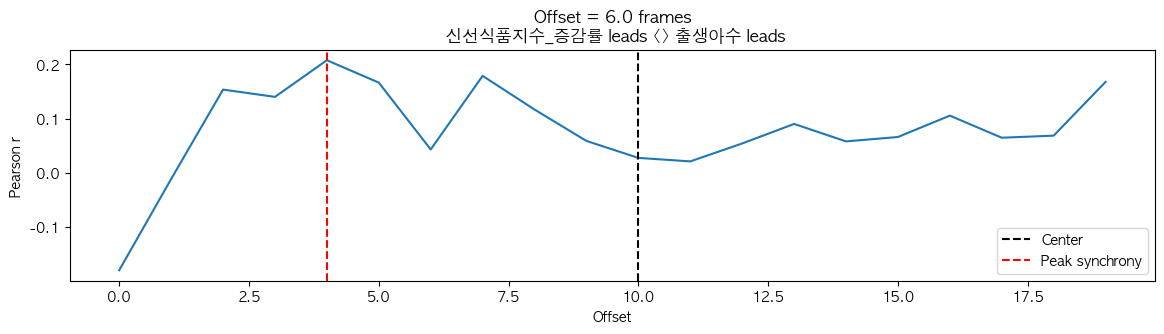

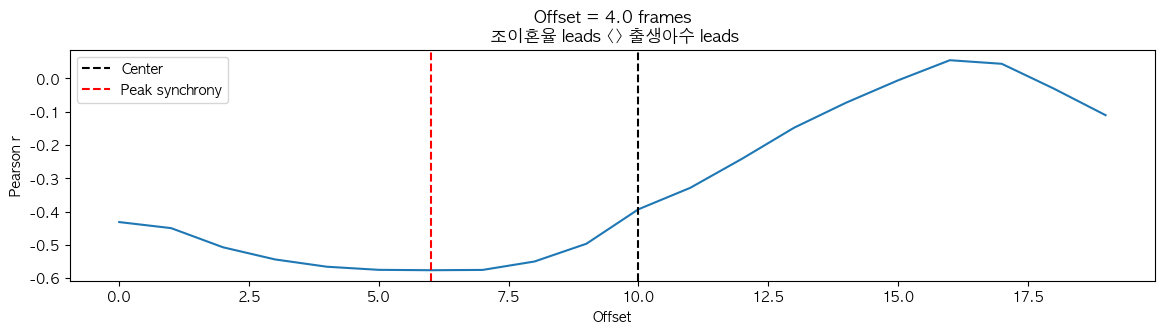

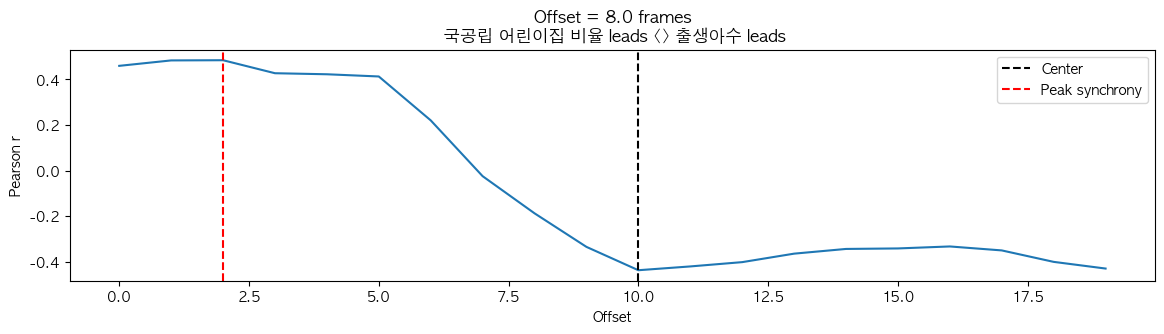

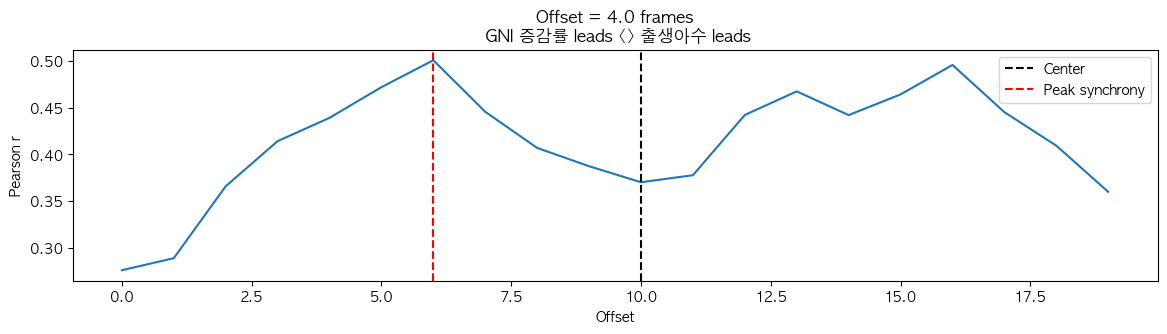

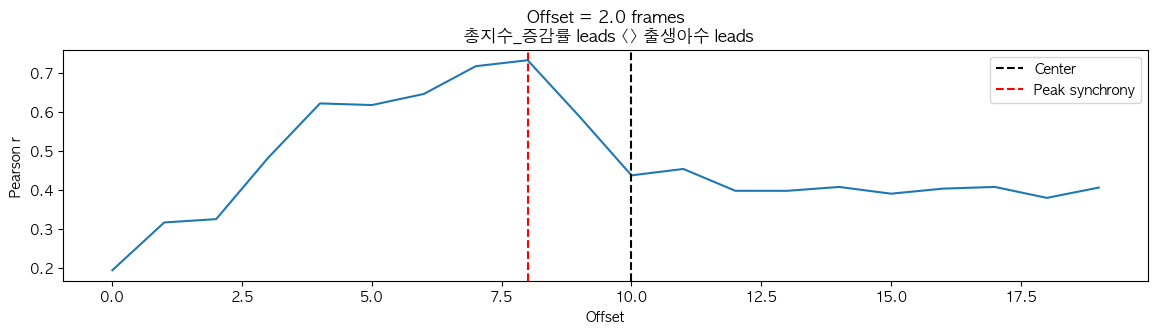

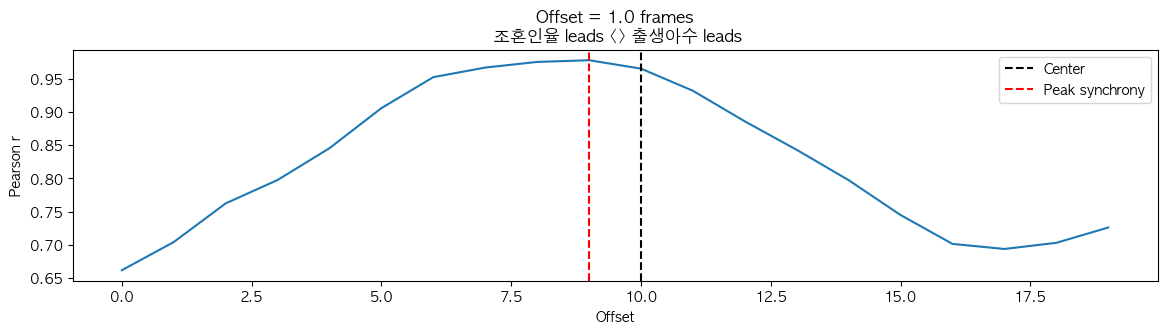

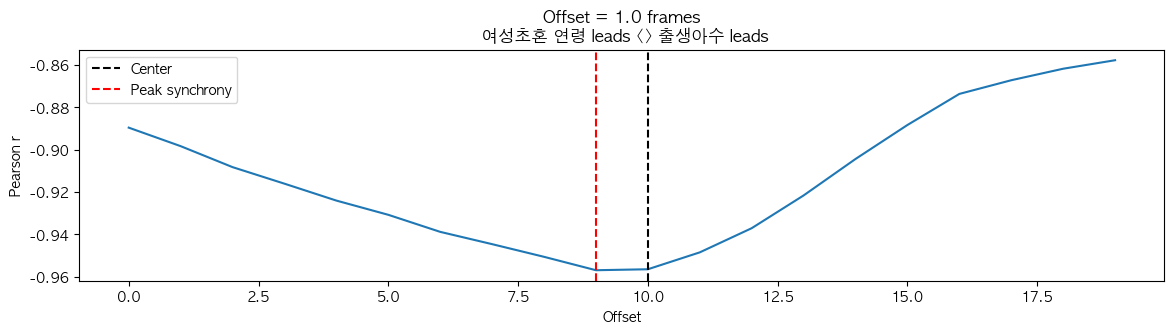

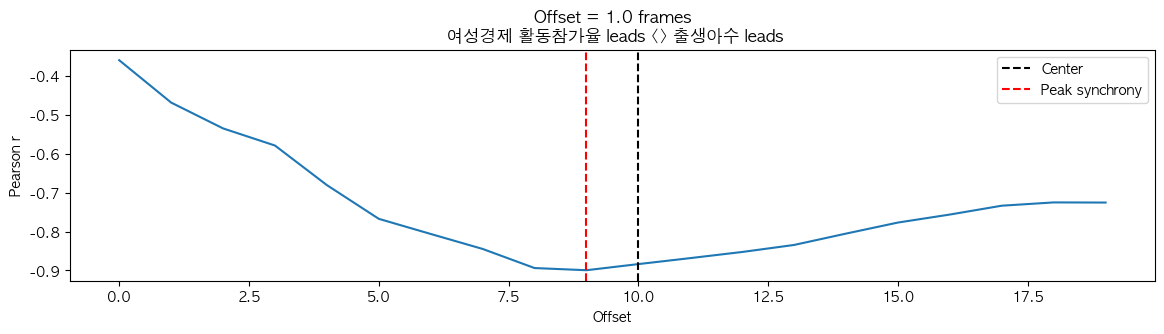

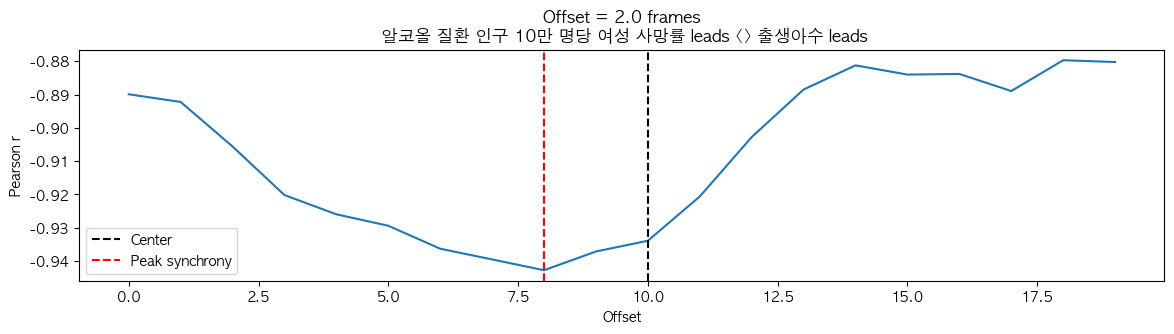

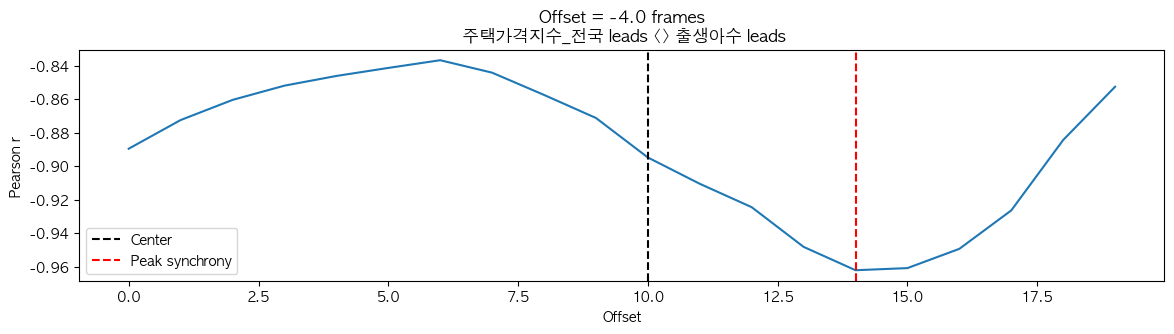

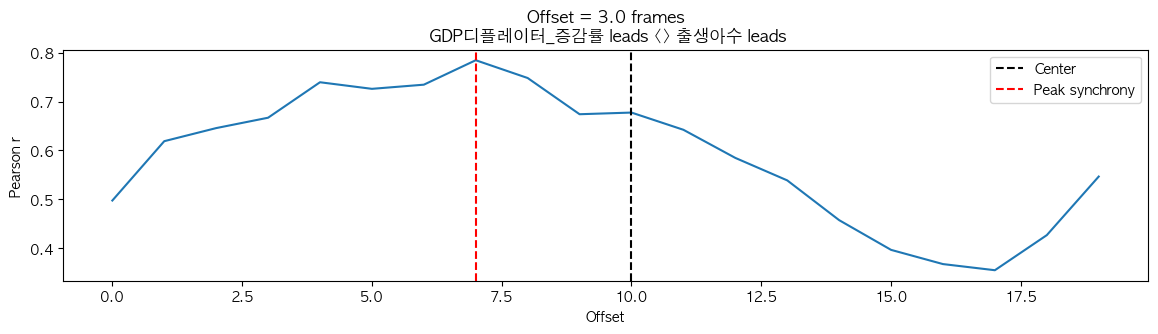

In [19]:
for i in range(len(select_data)):
    lags = 9
    try:
      rs = [crosscorr(select_data[i][select_data[i].columns[0]],y[y.columns[0]], lag) for lag in range(-lags-1,lags+1)]
    except:
      rs = [crosscorr(select_data[i],y[y.columns[0]], lag) for lag in range(-lags-1,lags+1)]
    offset = np.floor(len(rs)/2)-np.argmax(np.abs(rs)) # 최대 correlation 값 가지는 offset 계산 >> 절댓값

    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(np.abs(rs)),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} frames\n {select_name[i]} leads <> 출생아수 leads', xlabel='Offset',ylabel='Pearson r')
    # ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    # ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
    plt.legend()

In [23]:
final_index = [i for i in cause_index if i not in {'신선식품지수_증감률','국공립 어린이집 비율'}]

In [24]:
pickle_preprocess = df[final_index]
pickle.dump(pickle_preprocess, open('../preprocess_data/pickle_preprocess.pkl', 'wb'))

In [27]:
print(len(pickle_preprocess.columns))

9


In [28]:
pickle_preprocess

,조이혼율,GNI 증감률,총지수_증감률,조혼인율,여성초혼 연령,여성경제 활동참가율,알코올 질환 인구 10만 명당 여성 사망률,주택가격지수_전국,GDP디플레이터_증감률
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,NaN,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-01,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967-01-01,NaN,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968-01-01,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-01-01,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
